In [28]:
import os,datetime,pickle
from matplotlib import pyplot as plt
from pyhspf.preprocessing import NWISExtractor

gageid='07161450'
NWIS = 'NWIS-metadata'
directory = 'DATA-{}'.format(gageid)
watershed_HUC8='11050003'


nwisextractor = NWISExtractor(NWIS)   #check the NWIS folder, see if it exists.


destination directory does not exist



In [32]:
#download the metadata information of entire gagestations in USA.
#and extract selected metadata information into created 'DATA' forlder.
nwisextractor.extract_HUC8(watershed_HUC8, directory) 


NWIS directory NWIS-metadata exists

NWIS source metadata file NWIS-metadata/USGS_Streamgages-NHD_Locations_Shape.zip is present

gage metadata NWIS-metadata/USGS_Streamgages-NHD_Locations is present

gage station file DATA-07161450/gagestations exists



In [31]:
start = datetime.datetime(1930, 1, 1)      # start date for timeseries
end   = datetime.datetime(2020, 1, 1)      # end date for timeseries
gagepath='{}/gagedata'.format(directory)
if not os.path.isdir(gagepath):
    nwisextractor.download_all(start, end, output = gagepath)
    
gagedata  = 'Cimarron River near Ripley'
nwisextractor.download_gagedata(gageid, start, end, output = gagedata)

print('The water flow information for the Cimarron River near Ripley, OK')
print('')

p = '{}/{}'.format(gagepath,gageid)    #identify p as the picked_gageid file 
                                           #under 'data-curves' folder.
with open(p, 'rb') as f:      #open p file and ensure the file is 'clean up' 
                              #after finish the process
        
    station = pickle.load(f)      #to load pickled data from p file

# the following are attributes of the station directly from the database

print('Gage ID:                     ', station.gageid)
print('Name:                        ', station.name)
print('State:                       ', station.state)
print('First day of measurement:    ', station.day1)
print('Last day of measurement:     ', station.dayn)
print('Drainage area (square miles):', station.drain)
print('Average flow (cfs):          ', station.ave)
print('NWIS url:                    ', station.web)

gage data for 07161450 exist

The water flow information for the Cimarron River near Ripley, OK

Gage ID:                      07161450
Name:                         Cimarron River near Ripley, OK
State:                        OK
First day of measurement:     19871001
Last day of measurement:      20040930
Drainage area (square miles): 17979.0
Average flow (cfs):           2220.978
NWIS url:                     http://waterdata.usgs.gov/nwis/nwisman/?site_no=07161450


1:00:00
2019-01-01 01:00:00


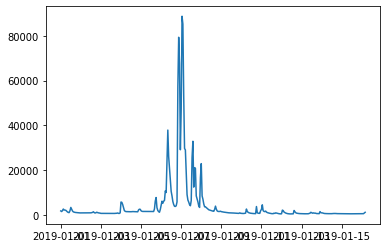

In [39]:
s = datetime.datetime(2019, 1, 1)  # Start date 
e = datetime.datetime(2020, 1, 1)   # End date

ts = station.make_timeseries(start = s, end = e)
deltat=datetime.timedelta(hours=1)
s1=s+deltat  
a=[]
for i in range(365):
    a.append(s+i*deltat)
from matplotlib import dates

fig=plt.plot(a,ts)

print(deltat)
print(s1)